# Fitbit Data Processing and Calculation of Participants' Daily Wear Time

This method was primarily developed for research studies using Fitbit.

This notebook will walk you through a way to process and visualize Fitbit data. In particular, I will show how you can calculate daily wear time to determine how much your participants wore the Fitbit throughout the study you conducted.

The dataset I will use can be found [here](https://www.kaggle.com/datasets/arashnic/fitbit). If your dataset is presented in a different way, you can still use this notebook by formatting your dataset so it resembles the format of this one.  

If you're having any difficulty throughout this notebook, to format your data, or to install dependencies, please reach out using the Github platform. I will be happy to help you.

## Getting Started

You will need to load a couple of packages first. If you do not have these, you can install them as shown [here](https://www.listendata.com/2019/04/install-python-package.html).

In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib
%matplotlib inline
import seaborn as sns
%autosave 60 
print("Setup Complete")

Autosaving every 60 seconds
Setup Complete


## Reading your Data

We will start by loading the data. To use the example data, you can download the Kaggle files and save them in a folder named Fitabase_data_fromKaggle, within the same folder as the one you are using for this jupyter notebook.

In [2]:
heartrate = pd.read_csv("Fitabase_data_fromKaggle/heartrate_seconds_merged.csv")
steps = pd.read_csv("Fitabase_data_fromKaggle/minuteStepsNarrow_merged.csv")

Let's look at it!

In [3]:
heartrate.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [4]:
heartrate.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


Let's investigate the Id columns: How many participants do I have? Do I have the same participants across files?

In [5]:
heartrate.Id.unique()

array([2022484408, 2026352035, 2347167796, 4020332650, 4388161847,
       4558609924, 5553957443, 5577150313, 6117666160, 6775888955,
       6962181067, 7007744171, 8792009665, 8877689391])

In [6]:
steps.Id.unique()

array([1503960366, 1624580081, 1644430081, 1844505072, 1927972279,
       2022484408, 2026352035, 2320127002, 2347167796, 2873212765,
       3372868164, 3977333714, 4020332650, 4057192912, 4319703577,
       4388161847, 4445114986, 4558609924, 4702921684, 5553957443,
       5577150313, 6117666160, 6290855005, 6775888955, 6962181067,
       7007744171, 7086361926, 8053475328, 8253242879, 8378563200,
       8583815059, 8792009665, 8877689391])

Mmmh.. Seems like I have more participants in the steps data than in the heartrate data. Let's check whether the participants in the heartrate data are contained in the steps data.

In [7]:
check = all(item in steps.Id.unique() for item in heartrate.Id.unique())

if check is True:
    print("All participants in the heartrate dataset are within the steps dataset.")
else:
    print("Some participants in the heartrate dataset are not in the steps dataset.")

All participants in the heartrate dataset are within the steps dataset.


Great, so we will be working with 14 participants to have both heartrate and steps.

## Formatting the Data

I will rename the time column in the steps dataset so it has the same name as the heartrate dataset time column. I also don't like the name "value" for heartrate values, so I will rename that as well.

In [8]:
steps = steps.rename(columns = {'ActivityMinute':'Time'})
heartrate = heartrate.rename(columns = {'Value':'Heartrate'})

We will convert the Time column of both datasets to make sure Python knows we are dealing with date and times. This might take a bit of time if your dataset is large.

In [9]:
steps.Time = pd.to_datetime(steps.Time)
heartrate.Time = pd.to_datetime(heartrate.Time)

Lastly, we need to make sure the data is sorted by time. 

In [10]:
steps = steps.sort_values(by = 'Time')
heartrate = heartrate.sort_values(by = 'Time')

## Some Visualization

Let's visualize some of the data here. I will pick a participant and look at their data over time.

In [11]:
# Setup the font for your plots the way you want it
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)
matplotlib.rc('axes', titlesize = 18)

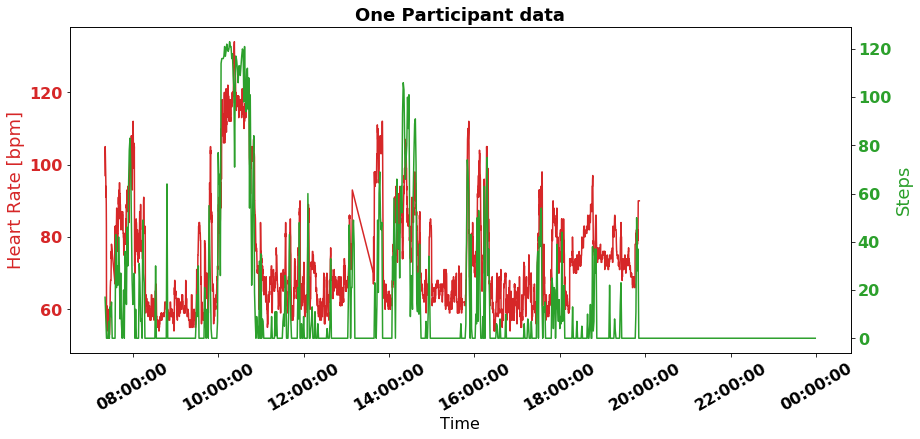

In [15]:
# Let's get data from the first participant over the first day
hr_participant_i = heartrate.loc[heartrate.Id == heartrate.Id[0],:]
steps_participant_i = steps.loc[steps.Id == heartrate.Id[0],:]
day1 = hr_participant_i.Time[0]
hr_day = hr_participant_i.loc[(hr_participant_i.Time >= day1) 
                                          & (hr_participant_i.Time < day1.ceil('D'))]
steps_day = steps_participant_i.loc[(steps_participant_i.Time >= day1) 
                                          & (steps_participant_i.Time < day1.ceil('D'))]
# Getting the data we want to plot:
x1 = hr_day.Time
y1 = hr_day.Heartrate
x2 = steps_day.Time
y2 = steps_day.Steps

# Creating plot with heartrate
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(111)
 
color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Heart Rate [bpm]', color = color, fontsize = 18)
ax1.plot(x1, y1, color = color)
ax1.tick_params(axis ='y', labelcolor = color)
plt.xticks(rotation=30)

# Adding Twin Axes to plot using steps
ax2 = ax1.twinx()
 
color = 'tab:green'
ax2.set_ylabel('Steps', color = color, fontsize = 18)
ax2.plot(x2, y2, color = color)
ax2.tick_params(axis ='y', labelcolor = color)
myFmt = mdates.DateFormatter('%H:%M:%S')
ax2.xaxis.set_major_formatter(myFmt)
# Adding title
plt.title('One Participant data', fontweight ="bold")
 
# Show plot
plt.show()

We can see here the coherence of the data. As expected, heart rate and steps are correlated to some extent. In particular, you should see a rise of heart rate to around 110-120bpm (range of heart rate for walking in healthy adults) when someone is walking.

## Daily Wear Time Calculation

In this section we will calculate how much time someone was wearing the sensor per day. The calculations are done using heart rate data on a minute basis. We assume that whenever a value of heart rate is registered, it means the participant was wearing the watch.

$$
Wear Time = \frac{Number Minutes of HeartRate}{Total Minutes} 
$$

In [16]:
# ----- Initialization -------
# daily_weartime_all will contain values of daily wear time in ...
# percentage for each participant
daily_weartime_all = []

# daily_weartime_all_t will contain the dates to which the daily ...
# wear time values correspond to
daily_weartime_all_t = []

# ----- Loop -----
# We will loop over the ids contain in heartrate, since we are using ...
# heartrate to calculate wear time
ids = heartrate.Id.unique()
for i in range(len(ids)):
    participant_id = ids[i]
    data_participant_i = heartrate.loc[heartrate.Id == participant_id,:]
    #grab beginning and end of dates to iterate through dates
    datestart = data_participant_i.Time.iloc[0].floor('D')
    dateend = data_participant_i.Time.iloc[-1].ceil('D')
    
    # Get the number of days we have data for an individual, 
    # could be replace by study period (ex: 90)
    nb_days = (dateend - datestart).days
    
    # initialize matrices that will contain wear time values
    daily_weartime_i = np.zeros(nb_days)
    daily_weartime_i_t = []
    
    # nextday contains a datetime that will be updated to 
    # advance through the dates day by day    
    nextday = datestart
    
    # sum_min will be the variable containing the number of minutes...
    # of heartrate contained in a day
    sum_min = 0
    
    # Loop through the days of data
    for d in range(nb_days):
        
        # Extract the data for this day
        mask_day = data_participant_i.loc[(data_participant_i.Time >= nextday) 
                                          & (data_participant_i.Time < nextday 
                                             + pd.DateOffset(1)),:]
        
        # If mask_day is not empty, 
        # it means we have some data for this day we can process
        if mask_day.shape[0] != 0:
            
            # Identify the gaps in the datetimes, e.g., 
            # where are the gaps of non-wear time
            timeplus = mask_day.Time.iloc[1:]
            timeminus = mask_day.Time.iloc[0:-1]
            seconds_data = (timeplus - timeminus.values)/np.timedelta64(1,'s')
            list_gaps = np.where(seconds_data > 60)[0]

            # If the list of indices is not empty, 
            # it means there are gaps we need to take into account            
            if len(list_gaps) != 0:
                
                # Here we are counting the minutes before and after gaps
                # This line is to get data from the start to the first gap
                sum_min = sum_min + (mask_day.Time.iloc[list_gaps[0]] 
                                       - mask_day.Time.iloc[0])/np.timedelta64(1,'m')
                
                # This line is to get data from the last gap to the end
                sum_min = sum_min + (mask_day.Time.iloc[-1] 
                                       - mask_day.Time.iloc[list_gaps[-1] + 1])/np.timedelta64(1,'m')
                
                # Then, we loop into the set of gaps stored into list_gaps
                for secs in range(1,len(list_gaps)):
                    
                    # limit: index of the gap j; limitminusone: index of previous gap + 1
                    limit = list_gaps[secs]
                    limitminusone = list_gaps[secs - 1] + 1
                    
                    # These two indices could be the same, 
                    # which means there would be some duplicates in the data
                    # there are sometimes
                    if limit != limitminusone:
                        # Here we add the minutes between the gaps 
                        sum_min = sum_min + (mask_day.Time.iloc[limit] 
                                               - mask_day.Time.iloc[limitminusone])/np.timedelta64(1,'m')
                    else:
                        # If there is a duplicate, we just add a minute
                        sum_min = sum_min + 1
                        
            # Else if the list of indices is empty, there are no gaps and the person wore the sensor for the whole day
            else:
                sum_min = sum_min + (mask_day.Time.iloc[-1] 
                                    - mask_day.Time.iloc[0])/np.timedelta64(1,'m')

            # The wear time for day d will be the number of minutes of data for this day
            # sum_min, divided by the total number of minutes in a day (24*60)
            daily_weartime_i[d] = sum_min*100/(24*60)
        
        # If mask_day is empty, 
        # it means we have no data for this day
        else:
            daily_weartime_i[d] = float("nan")
        
        # Once we found our value of compliance, 
        # we reinitilize the variables to start the loop again into the next day
        daily_weartime_i_t.append(nextday)
        sum_min = 0
        nextday = nextday + pd.DateOffset(1)
        
    daily_weartime_all.append(daily_weartime_i)  
    daily_weartime_all_t.append(daily_weartime_i_t)

Great! We have our values of daily wear time in percentage. Let's see what they look like.

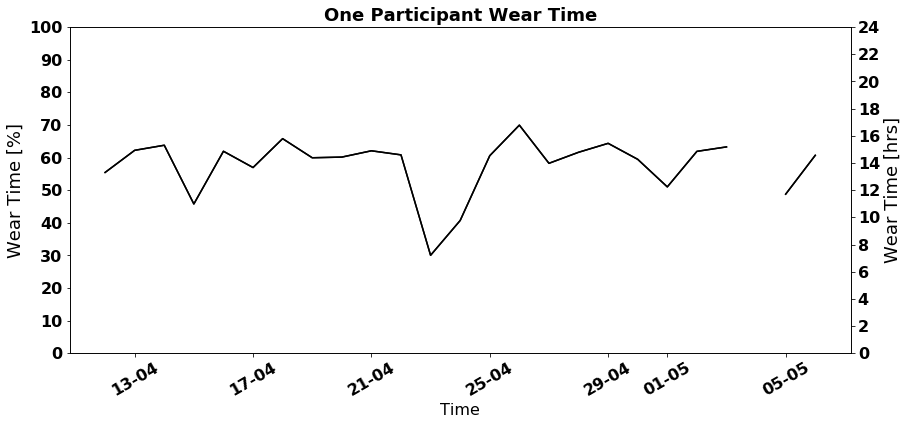

In [17]:
# Select an individual:
k = 5;

# Getting the data we want to plot:
x1 = daily_weartime_all_t[k]
y1 = daily_weartime_all[k]
y2 = daily_weartime_all[k]*24/100

# Creating plot with wear time in percentage
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(111)
 
color = 'black'
ax1.set_xlabel('Time')
ax1.set_ylabel('Wear Time [%]', color = color, fontsize = 18)
ax1.plot(x1, y1, color = color)
ax1.tick_params(axis ='y', labelcolor = color)
ax1.set_yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.ylim(0,100)
plt.xticks(rotation=30)

# Adding Twin Axes to plot using wear time in hours
ax2 = ax1.twinx()
 
color = 'black'
ax2.set_ylabel('Wear Time [hrs]', color = color, fontsize = 18)
ax2.plot(x1, y2, color = color)
ax2.tick_params(axis ='y', labelcolor = color)
ax2.set_yticks([0,2,4,6,8,10,12,14,16,18,20,22,24])
myFmt = mdates.DateFormatter('%d-%m')
ax1.xaxis.set_major_formatter(myFmt)
plt.ylim(0,24)

# Adding title
plt.title('One Participant Wear Time', fontweight ="bold")
 
# Show plot
plt.show()

We can also look at the distribution of average daily wear time for our population:

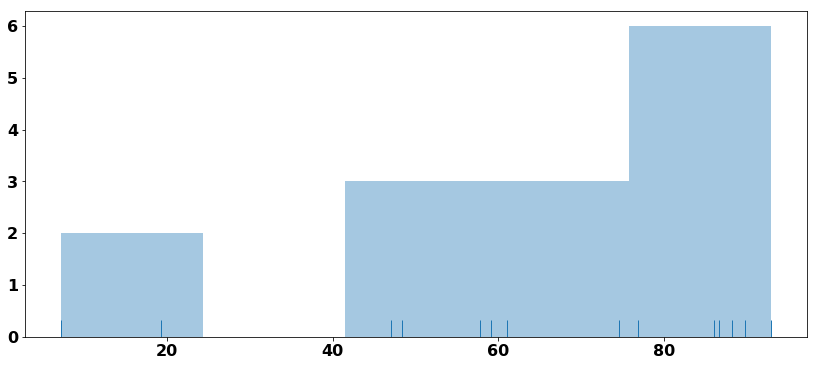

In [19]:
plt.figure(figsize=(14,6))
individual_averages = [np.nanmean(sub_list) for sub_list in daily_weartime_all]
# Histogram with actual as ticks
sns.distplot(individual_averages, bins = 5,kde=False, rug = True)

That's it! If you would like to see something else in this repository let me know :)